# Build network using user-defined resources

This notebook explores how to add other individual resources from Omnipath or other public databases.

In [1]:
%%time
from neko.core.network import Network
from neko._visual.visualize_network import NetworkVisualizer
from neko._inputs.resources import Resources
import omnipath as op

CPU times: user 3.73 s, sys: 1.53 s, total: 5.27 s
Wall time: 4.11 s


## 1. Adding a resource already in Omnipath



### 1A. Specify the interaction resource of interest

In [2]:
extra = op.interactions.LigRecExtra.get()

### 1B. Add new resource to the Resources object

In [3]:
resources = Resources()
resources.add_database(extra, reset_index=True)

The generated WARNING suggest that some interactions could be missing (like in this case, the Ligand-Receptor database from Omnipath does not contain any column "form_complex"); while this is limiting the amount of knowledge NeKo can extract, it does not prevent the package from working. Other possible cause of a WARNING is the absence of "consensus" columns. To avoid error in this case, set always consensus to False.

## 2. Adding a public database

Alternatively, the user might want to use their own interaction databases. We have already implemented the inclusion of some of widely used databases. 

As example, we show here how to integrate the [Signor 3.0](https://signor.uniroma2.it/) database. In order to do so, the User needs to have already downloaded the whole Signor database, available at the following link: [https://signor.uniroma2.it/downloads.php](https://signor.uniroma2.it/downloads.php) or with the following code:. 

### 2A. Add Signor database



In [4]:
resources = Resources()
resources.import_signor_tsv("all_data_31_05_24.tsv") # this function accept only tab separated values

In order to avoid conflict or errors, ensure that the file contains at least the following columns: IDA, IDB, EFFECT, ANNOTATOR, PMID, SIGNOR_ID

### 
<div class="alert alert-info">

**Note**
    
SIGNOR uses has different identifiers for complexes, protein family, phenotype, etc.
It is possible that the network contains nodes names like "Signor_pf32" or something like this... This is not yet translated, but if you are interested in what those nodes consist of, you can use download their vocabulary for the entities: [https://signor.uniroma2.it/downloads.php](https://signor.uniroma2.it/downloads.php)

</div>  



## 3. Build the network

### 3A. Import genes as network nodes

In [5]:
genes = ["SRC", "NOTCH1", "PTK2", "CDH1", "CDH2", "VIM", "MAP4K4", "LATS1", "LATS2"]

### 3B. Create network object by specifying the interaction resources

In [6]:
new_net1 = Network(genes, resources = resources.interactions)

In [7]:
#Print node dataframe
new_net1.nodes

,Genesymbol,Uniprot,Type
0,SRC,P12931,NaN
1,NOTCH1,P46531,NaN
2,PTK2,Q05397,NaN
3,CDH1,P12830,NaN
4,CDH2,P19022,NaN
5,VIM,P08670,NaN
6,MAP4K4,O95819,NaN
7,LATS1,O95835,NaN
8,LATS2,Q9NRM7,NaN


### 3C. Build network

The downstream steps to connect your nodes, are the same. Please see the [Network building](https://omniflow-project.readthedocs.io/en/latest/notebooks/network_building.html) tutorial for detailed explanations of each step.

In [10]:
%%time
new_net1.connect_nodes(only_signed=True, consensus_only=False)

CPU times: user 20.1 ms, sys: 1.01 ms, total: 21.1 ms
Wall time: 20.8 ms


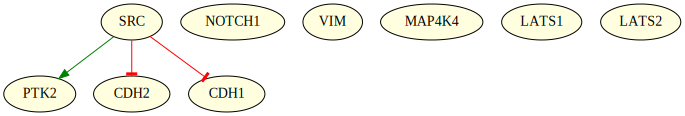

In [11]:
visualizer = NetworkVisualizer(new_net1, color_by='effect', noi=True)
visualizer.render()

<div class="alert alert-info">

**Note**
    
NB! It is important to note, that not all the databases have the same structure as Omnipath. In particular, if the columns "consensus" are missing, we suggest to avoid to use the flag `consensus` or `consensus_only` when using NeKo with customize databases. As a general advise, we suggest to always use `consensus=False` when you are using a database different from the Omnipath. 

</div>  

In [12]:
%%time
new_net1.complete_connection(maxlen=3, algorithm="bfs", only_signed=True, connect_with_bias=False, consensus=False) 

CPU times: user 771 ms, sys: 90 µs, total: 771 ms
Wall time: 770 ms


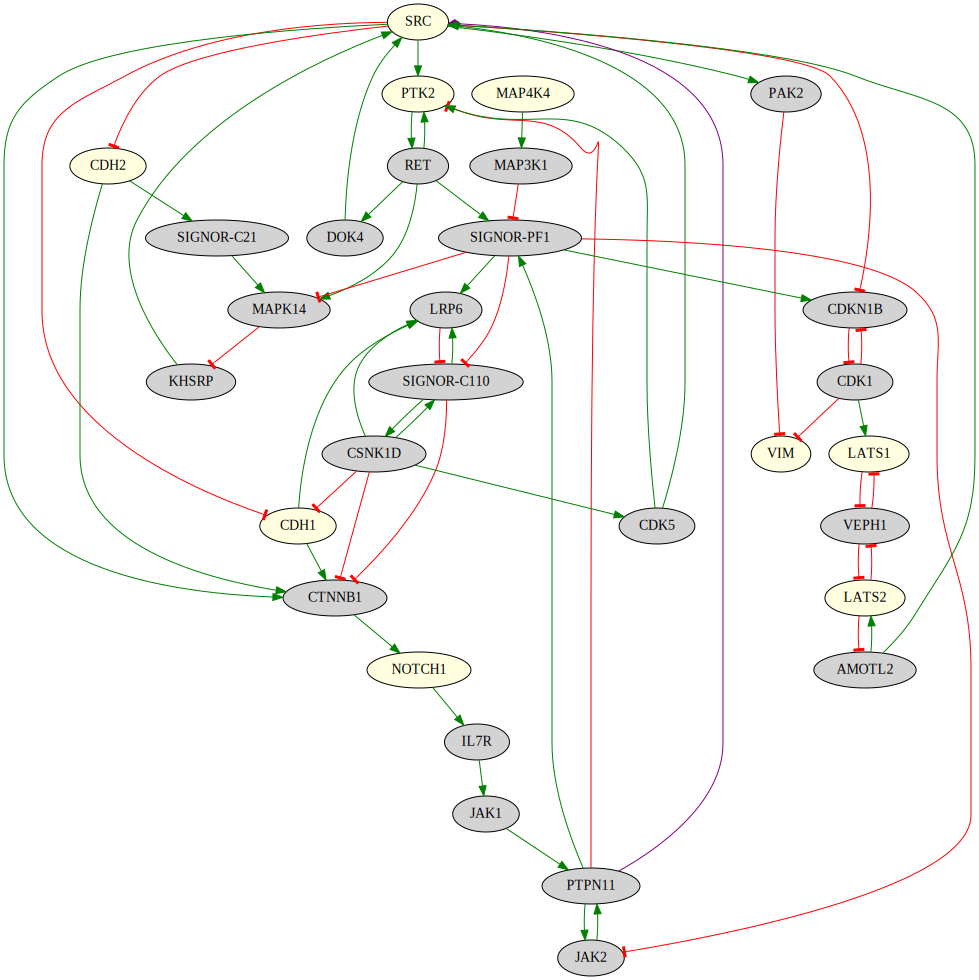

In [13]:
#Visualize network
visualizer1 = NetworkVisualizer(new_net1, color_by='effect', noi=True)
visualizer1.render()

In [14]:
from neko._outputs.exports import Exports

In [15]:
export = Exports(new_net1)

In [16]:
export.export_bnet()
export.export_sif()

Bimodal interactions:
PRKACA -> NF2
Reference: 18071304
